# Reconstructing The Stochastic Gates Research
---
### Geometry of Information Course - Milestone #2 

**Made by**:<br>
[Aviv Gelfand](https://www.linkedin.com/in/aviv-gelfand/v) <br>
[Jonathan Wiesenfeld](https://il.linkedin.com/in/jonathan-wiesenfeld)

**Lectured by:** [Prof. Ariel Jaffe](https://arieljaffe.huji.ac.il/) 


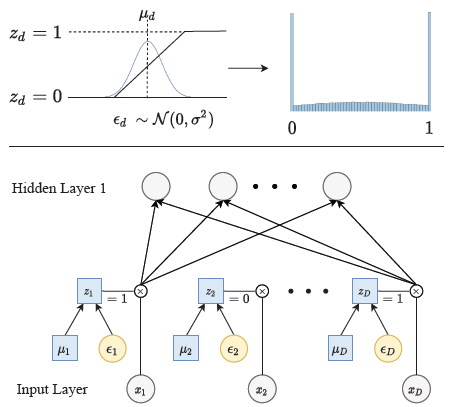
---

In this notebook, we apply the Stochastic Gates (STG) algorithm to both simulated and imported datasets to evaluate its efficacy in feature selection, through regression and classification tasks.

### Installing dependencies

In [5]:
# %pip install scikit-learn
# %pip install pandas
# %pip install seaborn
# %pip install torch
# %pip install stg 
# %pip install matplotlibv

# Regression and `sin_dataset`

We employ the STG algorithm, configured for regression tasks, with a neural network architecture comprising hidden layers with dimensions [500, 50, 10] and tanh activation. The model utilizes SGD optimization, a learning rate of 0.1, and feature selection enabled to discern the most relevant features influencing the regression outcome. The training process involves 3000 epochs with validation on a subset to monitor performance and prevent overfitting.

In [50]:
### Helper function to save and compare regression metrics 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

def calculate_and_append_metrics(model_name, model, X_train, y_train, X_test, y_test, train_results_df, test_results_df):
    # Calculate metrics for the training dataset
    train_metrics = pd.DataFrame({
        'Model': model_name,
        'R2 Score': [r2_score(y_train, model.predict(X_train))],
        'RMSE': [mean_squared_error(y_train, model.predict(X_train), squared=False)],
        'MAE': [mean_absolute_error(y_train, model.predict(X_train))],
        'MAPE': [mean_absolute_percentage_error(y_train, model.predict(X_train))]
    })

    # Calculate metrics for the test dataset
    test_metrics = pd.DataFrame({
        'Model': model_name,
        'R2 Score': [r2_score(y_test, model.predict(X_test))],
        'RMSE': [mean_squared_error(y_test, model.predict(X_test), squared=False)],
        'MAE': [mean_absolute_error(y_test, model.predict(X_test))],
        'MAPE': [mean_absolute_percentage_error(y_test, model.predict(X_test))]
    })

    # Concatenate metrics to the respective DataFrames
    train_results_df = pd.concat([train_results_df, train_metrics], ignore_index=True)
    test_results_df = pd.concat([test_results_df, test_metrics], ignore_index=True)

    return train_results_df, test_results_df

In [4]:
from stg import STG
import numpy as np
import torch
import scipy.stats # for creating a simple dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

(1000, 20)
(1000, 1)


C:\Users\avivg\AppData\Local\Temp\ipykernel_19420\2780788879.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
C:\Users\avivg\AppData\Local\Temp\ipykernel_19420\2780788879.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[1].scatter(x=X_data[:, 2], y=X_data[:, 3], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )


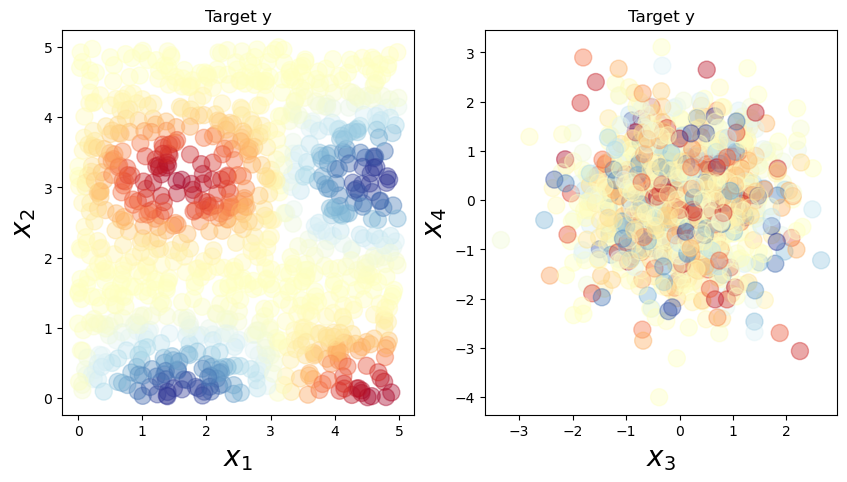

In [9]:
from stg import STG
import numpy as np
import torch
import scipy.stats # for creating a simple dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Create a simple dataset
def create_sin_dataset(n,p):
    x1=5*(np.random.uniform(0,1,n)).reshape(-1,1)
    x2=5*(np.random.uniform(0,1,n)).reshape(-1,1)
    y=np.sin(x1)*np.cos(x2)**3
    relevant=np.hstack((x1,x2))
    noise_vector = scipy.stats.norm.rvs(loc=0, scale=1, size=[n,p-2])
    data = np.concatenate([relevant, noise_vector], axis=1)
    return data, y.astype(np.float32)

n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data=create_sin_dataset(n_size,p_size)
print(X_data.shape)
print(y_data.shape)

f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
ax[0].set_xlabel('$x_1$', fontsize=20)
ax[0].set_ylabel('$x_2$', fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:, 2], y=X_data[:, 3], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
ax[1].set_xlabel('$x_3$', fontsize=20)
ax[1].set_ylabel('$x_4$', fontsize=20)
ax[1].set_title('Target y')
plt.tick_params(labelsize=10)


It can be observed that the target y is a non-linear function of the $X_1$ and $X_2$ features only.

Visual representation of the target variable y and the model's regression output on the synthetic dataset highlights the model's predictive accuracy and the non-linear relationship captured between the selected features and the target variable. This approach not only demonstrates the STG algorithm's potential in handling complex, noisy data but also its capability in feature selection and enhancing model interoperability.

Epoch: 1000: loss=0.136012 valid_loss=0.066760
Epoch: 2000: loss=0.067888 valid_loss=0.020886
Epoch: 3000: loss=0.035333 valid_loss=0.005140
(1000, 1)


C:\Users\avivg\AppData\Local\Temp\ipykernel_19420\812126903.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
C:\Users\avivg\AppData\Local\Temp\ipykernel_19420\812126903.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )


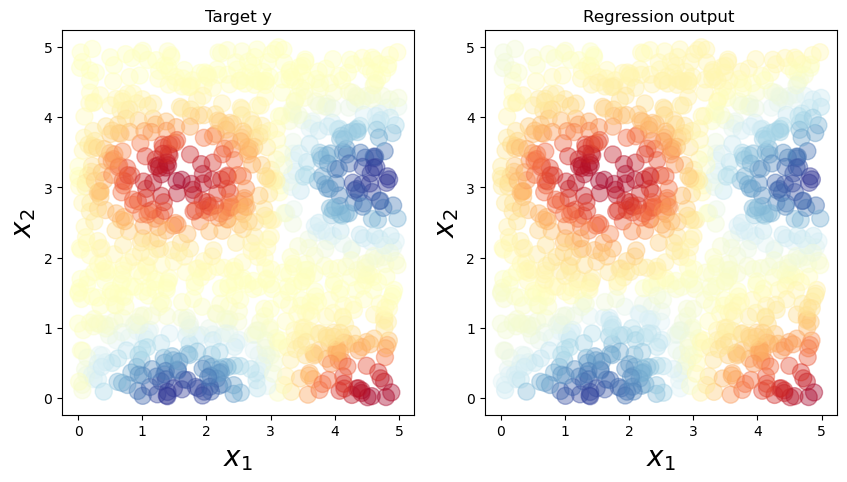

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.9)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu")
feature_selection = True
model = STG(task_type='regression',input_dim=X_train.shape[1], output_dim=1, hidden_dims=[500, 50, 10], activation='tanh',
    optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.1, random_state=1, device=device)

model.fit(X_train, y_train, nr_epochs=3000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

import torch
tmp_loss = torch.nn.MSELoss()
tmp_loss(torch.Tensor(y_train), torch.Tensor(model.predict(X_train)))

tmp_loss(torch.Tensor(y_test), torch.Tensor(model.predict(X_test)))

model.get_gates(mode='prob')

model.get_gates(mode='raw')


## TESTING THE MODEL

y_pred=model.predict(X_data)

print(y_pred.shape)

f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
ax[0].set_xlabel('$x_1$', fontsize=20)
ax[0].set_ylabel('$x_2$', fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
ax[1].set_xlabel('$x_1$', fontsize=20)
ax[1].set_ylabel('$x_2$', fontsize=20)
ax[1].set_title('Regression output ')
plt.tick_params(labelsize=10)
plt.show()


In [53]:
p_size_ls = [2,3,4,5,6,7,8,9, 10, 20, 100]
rmse_arr = []
for p in p_size_ls:
    print(f"p={p}")
    n_size = 1000  # Number of samples
    X_data, y_data = create_sin_dataset(n_size, p)
    # Rest of the code from the previous cell
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.9)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

    args_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if args_cuda else "cpu")
    feature_selection = True
    model = STG(task_type='regression',input_dim=X_train.shape[1], output_dim=1, hidden_dims=[500, 50, 10], activation='tanh',
        optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.1, random_state=1, device=device)
    print("fitting model")
    model.fit(X_train, y_train, nr_epochs=3000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

    import torch
    tmp_loss = torch.nn.MSELoss()
    tmp_loss(torch.Tensor(y_train), torch.Tensor(model.predict(X_train)))

    tmp_loss(torch.Tensor(y_test), torch.Tensor(model.predict(X_test)))

    model.get_gates(mode='prob')

    model.get_gates(mode='raw')


    ## TESTING THE MODEL

    y_pred=model.predict(X_data)


    print(y_pred.shape)
    # print rmse
    print(f"RMSE: {np.sqrt(np.mean((y_pred - y_data)**2))}")
    rmse_arr.append(np.sqrt(np.mean((y_pred - y_data)**2)))
    print("Gates: ", model.get_gates(mode='prob'))

    print("plotting results")
    
    # f, ax = plt.subplots(1, 2, figsize=(10, 5))

    # ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
    # ax[0].set_xlabel('$x_1$', fontsize=20)
    # ax[0].set_ylabel('$x_2$', fontsize=20)
    # ax[0].set_title('Target y')
    # ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=plt.cm.get_cmap('RdYlBu'), )
    # ax[1].set_xlabel('$x_1$', fontsize=20)
    # ax[1].set_ylabel('$x_2$', fontsize=20)
    # ax[1].set_title('Regression output ')
    # f.suptitle(f'STG Output for {p} Features', fontsize=16)
    # plt.tick_params(labelsize=10)
    # plt.show();

p=2
fitting model
Epoch: 1000: loss=0.171718 valid_loss=0.158521
Epoch: 2000: loss=0.170756 valid_loss=0.158183
Epoch: 3000: loss=0.170587 valid_loss=0.158183
(1000, 1)
RMSE: 0.405312180519104
Gates:  [0. 0.]
plotting results
p=3
fitting model
Epoch: 1000: loss=0.154873 valid_loss=0.110794


KeyboardInterrupt: 

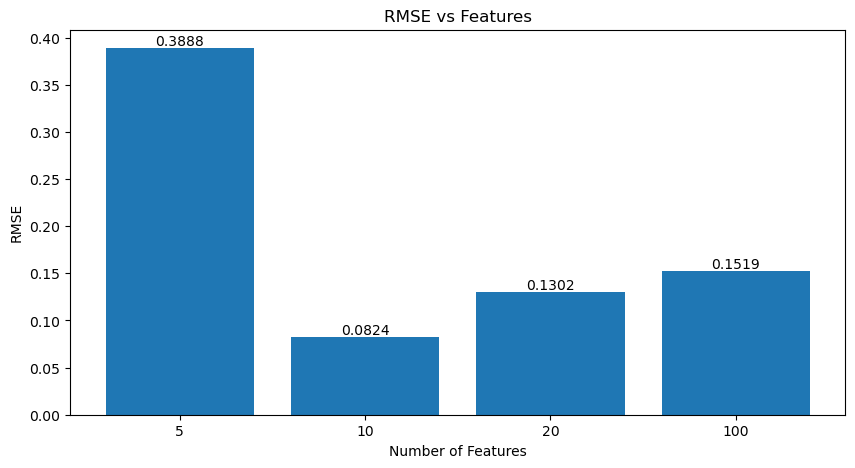

In [20]:

f, ax = plt.subplots(1, 1, figsize=(10, 5))

# ax[0].bar(range(len(p_size_ls)), rmse_arr)
ax.bar(range(len(p_size_ls)), rmse_arr)
ax.set_xticks(range(len(p_size_ls)))
ax.set_xticklabels(p_size_ls)
ax.set_xlabel('Number of Features')
ax.set_ylabel('RMSE')
ax.set_title(f'RMSE vs Features')

for i, v in enumerate(rmse_arr):
    ax.text(i, v, str(round(v, 4)), ha='center', va='bottom')

plt.tick_params(labelsize=10)
plt.show()

As shown in the above plot, the model successfully managed predict the correct output.

In [12]:
# from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split
from stg import STG  # Assuming this is your custom model import
import matplotlib.pyplot as plt
import os

## Predicting Song Popularity 
The following data set is a sample of 15000 songs from the Spotify API.

In [48]:
import pandas as pd
reg_url = 'https://raw.githubusercontent.com/FreeDataSets/DataPool/main/tracks_150000.csv' # this is the url for the dataset
reg_df = pd.read_csv(reg_url)#.sample(100000,random_state=42) # In order to reduce the size of the dataset, we are taking a random sample of 5000 rows from the dataset
reg_df.drop(['name', 'artists','id','release_date', 'artists_id','genre',], axis=1, inplace=True, errors='ignore') # Removing Categorical features with more then 10 unique values

# a preview of the dataframe
reg_df.info() 
reg_df.head()

reg_df.head()

# split the data into features and target variable 
Xreg = reg_df.drop('popularity', axis=1).values # features
yreg = reg_df['popularity'] # target variable

from sklearn.model_selection import train_test_split
# split the data into train and test sets
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler_reg = StandardScaler().fit(Xreg_train)
Xreg_train_scaled = scaler_reg.transform(Xreg_train)
Xreg_test_scaled = scaler_reg.transform(Xreg_test)


# Define model parameters
args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu")
feature_selection = True

# Initialize and fit the model
model = STG(task_type='classification',input_dim=X_train.shape[1],output_dim=2,hidden_dims=[500, 50, 10],            activation='tanh',optimizer='SGD',learning_rate=0.1,batch_size=32,
            feature_selection=feature_selection,sigma=0.5,lam=0.1,random_state=1,device=device)

model.fit( X_train, y_train, nr_epochs=3000, valid_X=X_test, valid_y=y_test, print_interval=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        150000 non-null  int64  
 1   duration_ms       150000 non-null  int64  
 2   explicit          150000 non-null  int64  
 3   danceability      150000 non-null  float64
 4   energy            150000 non-null  float64
 5   key               150000 non-null  int64  
 6   loudness          150000 non-null  float64
 7   speechiness       150000 non-null  float64
 8   acousticness      150000 non-null  float64
 9   instrumentalness  150000 non-null  float64
 10  liveness          150000 non-null  float64
 11  valence           150000 non-null  float64
 12  tempo             150000 non-null  float64
 13  time_signature    150000 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 16.0 MB


# Classification

## UCI Madelon Dataset 

MADELON is an artificial dataset containing data points grouped in 32 clusters placed on the vertices of a five dimensional hypercube and randomly labeled 1 or 0. The five dimensions constitute 5 informative features. 15 linear combinations of those features were added to form a set of 20 (redundant) informative features. Based on those 20 features one must separate the examples into the 2 classes (corresponding to the +-1 labels). We added a number of distractor feature called 'probes' having no predictive power. The order of the features and patterns were randomized.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import pandas as pd
madelon = pd.read_csv('madelon.csv')
# madelon['Class'] = madelon['Class'].map({1: 0, 2: 1})
# madelon

# Split the data into features and target
X = madelon.drop('Class', axis=1).values
y = madelon['Class'].values

# Convert labels from 1, 2 to 0, 1 for PyTorch compatibility
y = y - 1

# Check for any unexpected values
print("Unique labels:", np.unique(y))

# Ensure there are no invalid (e.g., negative) values
if np.any(y < 0):
    print("Found unexpected negative values in the target variable.")
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define model parameters
args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu")
feature_selection = True

# Initialize and fit the model
model = STG(task_type='classification',input_dim=X_train.shape[1],output_dim=2,hidden_dims=[100, 50, 10],            activation='tanh',optimizer='SGD',learning_rate=0.1,batch_size=32,
            feature_selection=feature_selection,sigma=0.5,lam=0.1,random_state=1,device=device)

model.fit( X_train, y_train, nr_epochs=100, valid_X=X_test, valid_y=y_test, print_interval=1000)

# Create predictions
y_pred = model.predict(X_test)

# Print the predictions
# print(y_pred)


Unique labels: [0 1]
[1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0
 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1

c:\Users\avivg\1My Code Scripts\GeometryOfInformation\.conda\lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have the true labels in y_true and the predicted labels in y_pred
report = classification_report(y_test, y_pred)


print(report)


## Two Moons Data Set


(1000,)
(1000, 20)
(1000, 20)
(1000,)


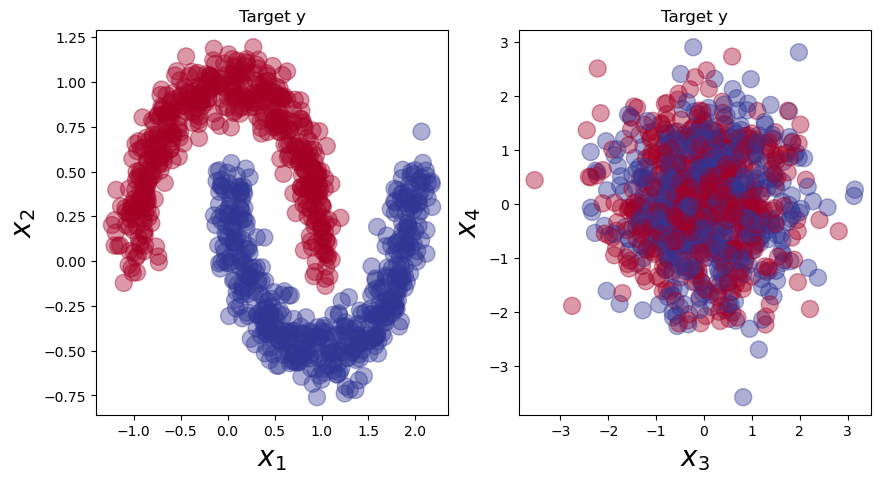

c:\Users\avivg\1My Code Scripts\GeometryOfInformation\.conda\lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 1000: loss=0.277930 valid_loss=0.192868
Epoch: 2000: loss=0.225879 valid_loss=0.162461
Epoch: 3000: loss=0.068260 valid_loss=0.013376
Epoch: 4000: loss=0.062772 valid_loss=0.009344
Epoch: 5000: loss=0.066544 valid_loss=0.011177
Epoch: 6000: loss=0.060762 valid_loss=0.007496
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 2.1546     1.6424322 -1.6190051 -1.6141644 -1.6210912 -1.6156664
 -1.6167022 -1.6171824 -1.6186913 -1.6180112 -1.611392  -1.61617
 -1.6168247 -1.6170818 -1.6158788 -1.6168811 -1.6138155 -1.6158236
 -1.6165388 -1.6208644]


In [14]:
from stg import STG
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
import torch

import numpy as np
from scipy.stats import norm


# Create a simple dataset
def create_twomoon_dataset(n, p):
    relevant, y = make_moons(n_samples=n, shuffle=True, noise=0.1, random_state=None)
    print(y.shape)
    noise_vector = norm.rvs(loc=0, scale=1, size=[n,p-2])
    data = np.concatenate([relevant, noise_vector], axis=1)
    print(data.shape)
    return data, y

n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data=create_twomoon_dataset(n_size,p_size)
print(X_data.shape)
print(y_data.shape)
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.colormaps['RdYlBu'])
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,2], y=X_data[:,3], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.colormaps['RdYlBu'])
ax[1].set_xlabel('$x_3$',fontsize=20)
ax[1].set_ylabel('$x_4$',fontsize=20)
ax[1].set_title('Target y')
plt.tick_params(labelsize=10)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)


args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu") 
feature_selection = True
model = STG(task_type='classification',input_dim=X_train.shape[1], output_dim=2, hidden_dims=[60, 20], activation='tanh',
    optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.5, random_state=1, device=device) 

model.fit(X_train, y_train, nr_epochs=6000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

print(model.get_gates(mode='prob'))

print(model.get_gates(mode='raw') )


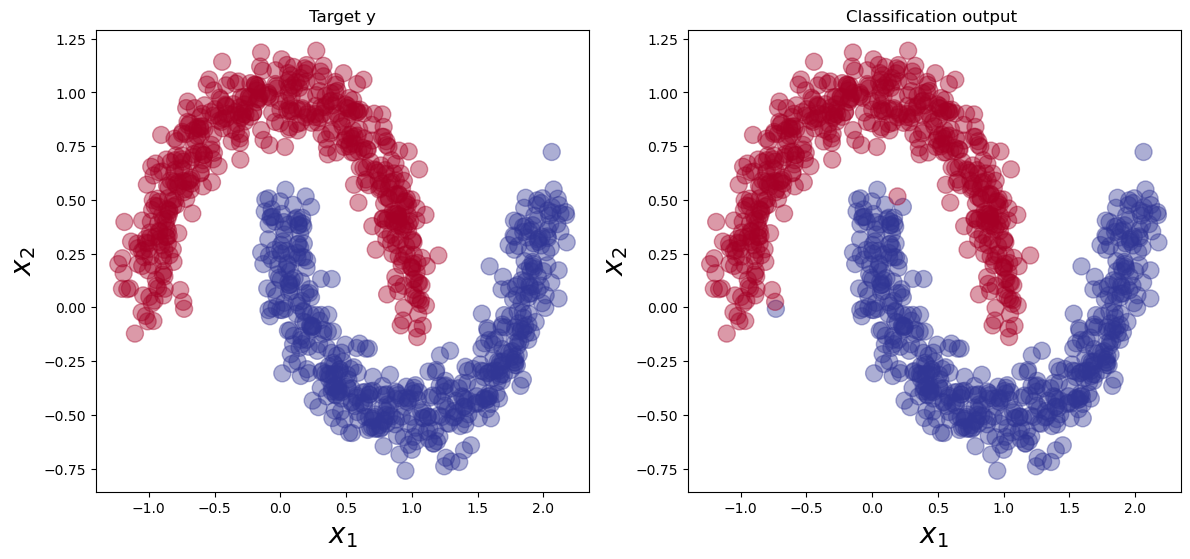

In [15]:
y_pred=model.predict(X_data)
import matplotlib.pyplot as plt
import matplotlib  # Make sure to import this

y_pred = model.predict(X_data)
f, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_data.reshape(-1), alpha=0.4, cmap=matplotlib.colormaps['RdYlBu'])
ax[0].set_xlabel('$x_1$', fontsize=20)
ax[0].set_ylabel('$x_2$', fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:, 0], y=X_data[:, 1], s=150, c=y_pred.reshape(-1), alpha=0.4, cmap=matplotlib.colormaps['RdYlBu'])
ax[1].set_xlabel('$x_1$', fontsize=20)
ax[1].set_ylabel('$x_2$', fontsize=20)
ax[1].set_title('Classification output ')
plt.tick_params(labelsize=10)

### Confusion Matrix

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_data, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_data' is not defined

In [ ]:

conf_matrix_train = confusion_matrix(y_train_flat, y_pred_train_flat)
# conf_matrix_test = confusion_matrix(y_test_np, y_pred_test)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [25]:
madelon.shape
X_data.shape

(1000, 20)

# Results

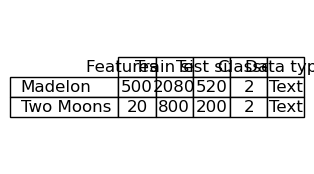

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Define the data for the table as a dictionary

# data only for madelon and "two moons" datasets

data = {
    'Features (D)': [500, 20],
    'Train size' : [2080, 800],
    'Test size' : [520, 200],   
    'Classes' : [2, 2],
    'Data type' : ['Text', 'Text']
}

df = pd.DataFrame(data, index=['Madelon', 'Two Moons'])

# Rendering the DataFrame as a matplotlib table
fig, ax = plt.subplots(figsize=(2, 2))  # set size frame
ax.axis('tight')
ax.axis('off')
the_table = table(ax, df, loc='center', cellLoc='center', colLoc='center')

# Apply font and alignment properties to the table
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.2)

plt.show()
